In [24]:
import os
import scripts.utils as utils
import pandas as pd
import geopandas as gpd

In [25]:
YEARS = utils.load_list(os.path.join("/Users/alison/Documents/RAPID/correlation-analysis/data_temp", "nf", "years"))

In [28]:
buffer = gpd.read_file("/Users/alison/Documents/RAPID/correlation-analysis/data_temp/wrz_buffer.gpkg")
buffers_wrz = buffer[buffer['RZ_ID'] == 1]

In [29]:
basinpath = "/Users/alison/Documents/RAPID/correlation-analysis/data_temp/nf/by_basin/wrz_1/NF1.parquet"
wah_coords = gpd.read_parquet(basinpath, filters=[("Year", "=", int(YEARS[0])), ("Month", "=", 1)])

In [30]:
wah_map = gpd.overlay(wah_coords, buffers_wrz, how='intersection') # TODO

In [32]:
wah_map['buffer'].unique()

array([100., 150., 200., 500.,  50.,  25.])

In [33]:
buffers_wrz['buffer'].unique()

array([  5.,  10.,  25.,  50., 100., 150., 200., 500.])

<Axes: >

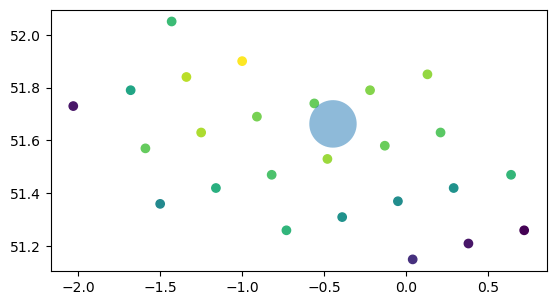

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

wah_coords.plot('ep', ax=ax)
buffers_wrz.query("buffer == 10.0").plot(ax=ax, alpha=.5)

In [98]:
path = "/Users/alison/Documents/RAPID/correlation-analysis/data_input/w@h/nf/near_future_2020_effpre.csv"

test = pd.read_csv(path, index_col=[0])[['lat', 'lon']].drop_duplicates()
test = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(test['lon'], test['lat']))
test = test.set_crs('EPSG:4326')
test_pm = test.to_crs("EPSG:27700")

test_pm['x'] = test_pm.geometry.x
test_pm['y'] = test_pm.geometry.y

In [99]:
from scipy.spatial import distance_matrix

# Extract the latitude and longitude coordinates of the points in df1 and df2
coords_df1 = test_pm[['y', 'x']].values
coords_df2 = test_pm[['y', 'x']].values

# Compute the pairwise distances between the points in df1 and df2
dist_matrix = distance_matrix(coords_df1, coords_df2)

# Create a new DataFrame to store the distances
dist_df = pd.DataFrame(dist_matrix, index=test_pm.index, columns=test_pm.index)


In [115]:
sorted(dist_df.iloc[3, :].values)

[0.0,
 24479.893207924662,
 24522.655210311255,
 24522.722350602467,
 24522.923782485588,
 24523.9960322059,
 34621.39213897448,
 34622.4044693872,
 49043.55621346015,
 49051.92049165618,
 49052.09063606338,
 54722.466195439076,
 54722.68576078685,
 54776.265506009586,
 54777.8311131376,
 69240.22471196858,
 69241.92403889392,
 73559.15891096258,
 77485.88870737496,
 77487.65694469282,
 88292.47268588086,
 88294.69164149583,
 101044.1708924938,
 101046.03129045485,
 103853.63005394614,
 109539.54418741028,
 109541.56961507503,
 122420.5545073153,
 122421.00100981096,
 124968.51649161919,
 124970.5821749827,
 131924.90365659946,
 147106.20983481564,
 147108.4943740441,
 148889.85779553902,
 149087.19864961403,
 154783.6799661632,
 154954.48048425224,
 154954.66883561536,
 156708.93261637224,
 156709.13898486106,
 156710.3379156003,
 156756.09357821534,
 164161.15687212642,
 164161.50107258267,
 164296.53872869702,
 171619.79420506873,
 173073.9099303191,
 173091.06553545853,
 173091.504

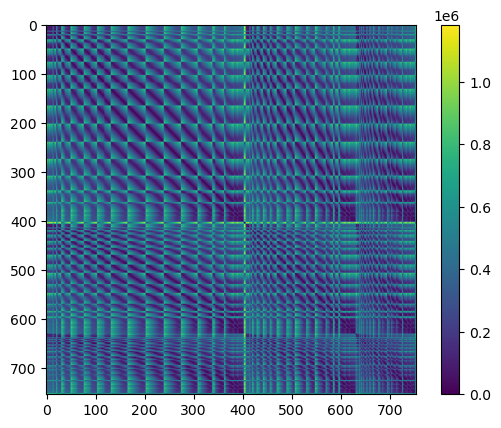

In [106]:
plt.imshow(dist_df.values)
plt.colorbar()

10000.0
10000.000000000757


<Axes: >

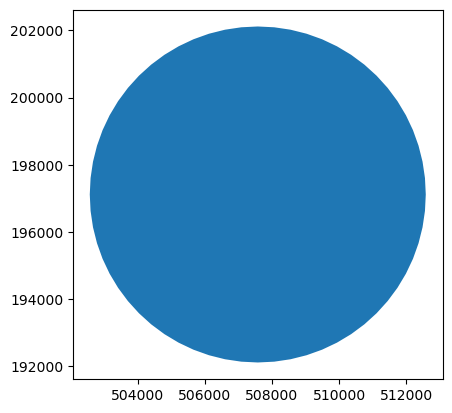

In [83]:
buffer_check = buffers_wrz.query("buffer == 5.0")
minx, miny, maxx, maxy = buffer_check.to_crs("EPSG:27700").total_bounds

print(maxx - minx)
print(maxy - miny)

buffer_check.to_crs("EPSG:27700").plot()

(51.5, 51.76)

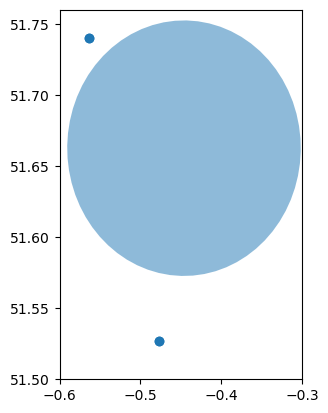

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# wah_coords.plot('ep', ax=ax)
buffers_wrz.query("buffer == 10.0").plot(ax=ax, alpha=.5)
test.plot(ax=ax)

ax.set_xlim((-.6, -.3))
ax.set_ylim((51.5, 51.76))